In [170]:
import os
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

In [147]:
DATA_PATH = os.path.abspath(
    r"C:\Users\schaf\Dropbox\_Programmieren\UdemyML\Chapter13_CaseStudies\CaseStudyIncome\adult.xlsx"
)

In [148]:
df = pd.read_excel(DATA_PATH)

print(df.columns)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [149]:
idxs = np.where(df["native-country"] == "Holand-Netherlands")[0]

In [150]:
data = df.to_numpy()
x = data[:, :-1]
x = np.delete(x, idxs, axis=0)
y = data[:, -1]
y = np.delete(y, idxs, axis=0)

print(x.shape, y.shape)

(48841, 10) (48841,)


### y-Data

<=50K: Class 0  
\>50K: Class 1  

In [151]:
def one_hot(y):
    return np.array([0 if val == "<=50K" else 1 for val in y], dtype=np.int8)

In [152]:
y = one_hot(y)

print(x.shape, y.shape)

(48841, 10) (48841,)


### Helper

In [153]:
def print_grid_cv_results(grid_result):
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    for mean, std, param in zip(means, stds, params):
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

### Sklearn Imports

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Classifier and Params

In [156]:
params = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 100, 200]
}

clf = RandomForestClassifier()

### Ordinal Features

In [157]:
categorical_columns = [1, 2, 3, 4, 5, 6, 7, 9]
numerical_columns = [0, 8]

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('onehot', OrdinalEncoder())
    ]
)

preprocessor_ordinal  = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [158]:
preprocessor_ordinal.fit(x_train)
x_train_ordinal = preprocessor_ordinal.transform(x_train)
x_test_ordinal = preprocessor_ordinal.transform(x_test)

print(f"Shape of ordinal data: {x_train_ordinal.shape}")
print(f"Shape of ordinal data: {x_test_ordinal.shape}")

Shape of ordinal data: (34188, 10)
Shape of ordinal data: (14653, 10)


In [172]:
pipe_ordinal = Pipeline(
    steps=[
        ('preprocessor_ordinal', preprocessor_ordinal),
        ('classifier', clf)
    ]
)

pipe_ordinal

Pipeline(steps=[('preprocessor_ordinal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 8]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 9])])),
                ('classifier', RandomForestClassifier())])

In [159]:
grid_ordinal = GridSearchCV(pipe_ordinal, params, cv=3)
grid_results_ordinal = grid_ordinal.fit(x_train, y_train)
print_grid_cv_results(grid_results_ordinal)

Best model score: 0.817947817947818 Best model params: {'classifier__max_depth': 200, 'classifier__n_estimators': 200} 
0.8169 (+/- 0.0022) with: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
0.8173 (+/- 0.002) with: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
0.8178 (+/- 0.0016) with: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
0.8174 (+/- 0.0024) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 50}
0.8179 (+/- 0.002) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 100}
0.8179 (+/- 0.0036) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 200}
0.8169 (+/- 0.001) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 50}
0.8174 (+/- 0.0034) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 100}
0.8179 (+/- 0.0012) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 200}


### One-Hot Features

In [160]:
categorical_columns = [1, 2, 3, 4, 5, 6, 7, 9]
numerical_columns = [0, 8]

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown="ignore", sparse=False))
    ]
)

preprocessor_onehot  = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [161]:
preprocessor_onehot.fit(x_train)
x_train_onehot = preprocessor_onehot.transform(x_train)
x_test_onehot = preprocessor_onehot.transform(x_test)

print(f"Shape of onehot data: {x_train_onehot.shape}")
print(f"Shape of onehot data: {x_test_onehot.shape}")

Shape of onehot data: (34188, 103)
Shape of onehot data: (14653, 103)


In [173]:
pipe_onehot = Pipeline(
    steps=[
        ('preprocessor', preprocessor_onehot),
        ('classifier', clf)
    ]
)

pipe_onehot

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 8]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 2, 3, 4, 5, 6, 7, 9])])),
                ('classifier', RandomForestClassifier())])

In [162]:
grid_onehot = GridSearchCV(pipe_onehot, params, cv=3)
grid_results_onehot = grid_onehot.fit(x_train, y_train)
print_grid_cv_results(grid_results_onehot)

Best model score: 0.8163098163098162 Best model params: {'classifier__max_depth': 100, 'classifier__n_estimators': 200} 
0.8139 (+/- 0.0036) with: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
0.8155 (+/- 0.0026) with: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
0.8163 (+/- 0.004) with: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
0.8149 (+/- 0.0028) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 50}
0.8152 (+/- 0.0028) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 100}
0.8163 (+/- 0.0016) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 200}
0.8152 (+/- 0.0016) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 50}
0.816 (+/- 0.003) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 100}
0.8152 (+/- 0.0044) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 200}


### TensorFlow Model

In [163]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [164]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [165]:
def build_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(units=128, input_dim=input_dim))
    model.add(Activation("relu"))
    model.add(Dense(units=64))
    model.add(Activation("relu"))
    model.add(Dense(units=output_dim))
    model.add(Activation("sigmoid"))
    return model

### Neural Network with Oridnal

In [174]:
model = build_model(
    input_dim=x_train_ordinal.shape[1],
    output_dim=y_train.shape[1]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=SGD(lr=0.001),
    metrics=["binary_accuracy"]
)

history_ordinal = model.fit(
    x=x_train_ordinal,
    y=y_train,
    epochs=20,
    validation_data=(x_test_ordinal, y_test)
)

Epoch 1/20
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5132 - binary_accuracy: 0.7610 - val_loss: 0.5006 - val_binary_accuracy: 0.7603
Epoch 2/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4831 - binary_accuracy: 0.7617 - val_loss: 0.4741 - val_binary_accuracy: 0.7613
Epoch 3/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4757 - binary_accuracy: 0.7638 - val_loss: 0.4682 - val_binary_accuracy: 0.7651
Epoch 4/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4723 - binary_accuracy: 0.7627 - val_loss: 0.4707 - val_binary_accuracy: 0.7620
Epoch 5/20
1069/1069 [==============================] - 3s 2ms/step - loss: 0.4681 - binary_accuracy: 0.7664 - val_loss: 0.4632 - val_binary_accuracy: 0.7719
Epoch 6/20
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4667 - binary_accuracy: 0.7657 - val_loss: 0.4614 - val_binary_accuracy: 0.7676
Epoch 7/20
1069/1069 [==============================

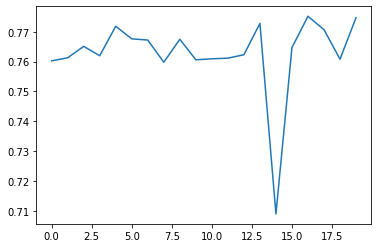

In [175]:
val_binary_accuracy = history_ordinal.history['val_binary_accuracy']

plt.plot(range(len(val_binary_accuracy)), val_binary_accuracy)
plt.show()

### Neural Network with OneHot

In [176]:
model = build_model(
    input_dim=x_train_onehot.shape[1],
    output_dim=y_train.shape[1]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=SGD(lr=0.001),
    metrics=["binary_accuracy"]
)

history_onehot = model.fit(
    x=x_train_onehot,
    y=y_train,
    epochs=20,
    validation_data=(x_test_onehot, y_test)
)

Epoch 1/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.5527 - binary_accuracy: 0.7575 - val_loss: 0.5036 - val_binary_accuracy: 0.7603
Epoch 2/20
1069/1069 [==============================] - 3s 2ms/step - loss: 0.4832 - binary_accuracy: 0.7609 - val_loss: 0.4670 - val_binary_accuracy: 0.7602
Epoch 3/20
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4530 - binary_accuracy: 0.7634 - val_loss: 0.4416 - val_binary_accuracy: 0.7672
Epoch 4/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4313 - binary_accuracy: 0.7763 - val_loss: 0.4233 - val_binary_accuracy: 0.7833
Epoch 5/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4162 - binary_accuracy: 0.7911 - val_loss: 0.4107 - val_binary_accuracy: 0.7996
Epoch 6/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4059 - binary_accuracy: 0.8014 - val_loss: 0.4020 - val_binary_accuracy: 0.8063
Epoch 7/20
1069/1069 [==============================

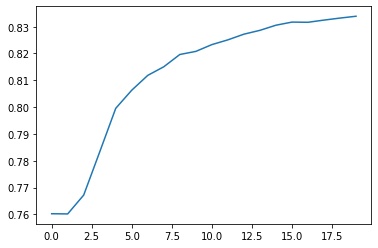

In [177]:
val_binary_accuracy = history_onehot.history['val_binary_accuracy']

plt.plot(range(len(val_binary_accuracy)), val_binary_accuracy)
plt.show()

### Pass in user-data

In [178]:
pipe_ordinal = Pipeline(
    steps=[
        ('preprocessor_ordinal', preprocessor_ordinal),
        ('classifier', clf)
    ]
)

pipe_ordinal.fit(x_train, y_train)
score = pipe_ordinal.score(x_test, y_test)

print(f"Score: {score}")

Score: 0.8166928274073568


In [179]:
x_sample = [
    25, 
    "Private",
    "11th",
    "Never-married",
    "Machine-op-inspct",
    "Own-child",
    "Black",
    "Male",
    40,
    "United-States",
]
y_sample = 0

y_pred_sample = pipe_ordinal.predict([x_sample])

print(f"Pred: {y_pred_sample}")

Pred: [0]
